In [88]:
import numpy as np
import math
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit # фитирующая процедура
from IPython.display import Image
from IPython.core.display import HTML 

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

# Эффект Холла

## Зависимость концентрации носителей от температуры при различном уровне легирования

Для примесного полупроводника из-за относительно малых ($\sim$ 0,05 эВ) значений энергии ионизации $E_d$ целесообразно начать
рассмотрение с низких температур($k_Б T \leq E_d \ll \Delta$). В этом случае расчет концентрации электронов для полупроводника n-типа (донорная примесь) дает следующее выражение:

\begin{equation}    \tag{1}
    n = \sqrt{\frac{N_c N_d}{2}} \exp \Big(-\frac{E_d}{k_Б T}\Big)
\end{equation}    

Если температура такова, что $k_Б T \gg E_d$, но $k_Б T \ll \Delta$, то все доноры ионизованы и $n = N_d$. При условии $k_Б T \geq \Delta$ концентрация носителей определяется шириной запрещенной зоны:

$$ \tag{2}
    n = N_c \exp \Big(-\frac{\Delta}{k_Б T}\Big)
$$

Рассмотрим зависимость на примере кремния, легированного фосфором(n - тип), с концентрациями примесей $10^{15} см^{-3}$ (почти не легированный), $10^{16} см^{-3}$, $10^{17} см^{-3}$ до $10^{18} см^{-3}$ (сильно легированный). 

Для кремния: $\Delta = 1.12 \ эВ$;  $N_c = 2.8 \cdot 10^{19} \ см^{-3}$.

### Константы 

In [89]:
dE = 1.12 #Ширина запрещенной зоны Si [эВ]
me = 1.08*0.51*10**6 #Эффективная масса электронов [эВ]
mh = 0.49*0.51*10**6 #Эффективная масса дырок [эВ]
Nd = np.array([10**15, 10**16, 10**17, 10**18]) #Концентрация примесей [cm^(-3)]
k = 8.617*(10**(-5)) #Постоянная Больцмана [эВ/К]
Ed = 0.05 #Энергия ионизации [эВ]
h = 8.617*10**(-5) #Постоянная планка

In [90]:
T1 = Ed/k #Температура, при которой ионизуются все примеси 
print(T1, 'К')

580.248346292213 К


Мы не сможем достичь такой температуры, поэтому достаточно будет рассмотреть случай примесной проводимости. А при концентрации $N_d = 10^{18} см^{-3}$ считаем, что примесный уровень превращается в зону и сливается в нашем случае с зоной проводимости.

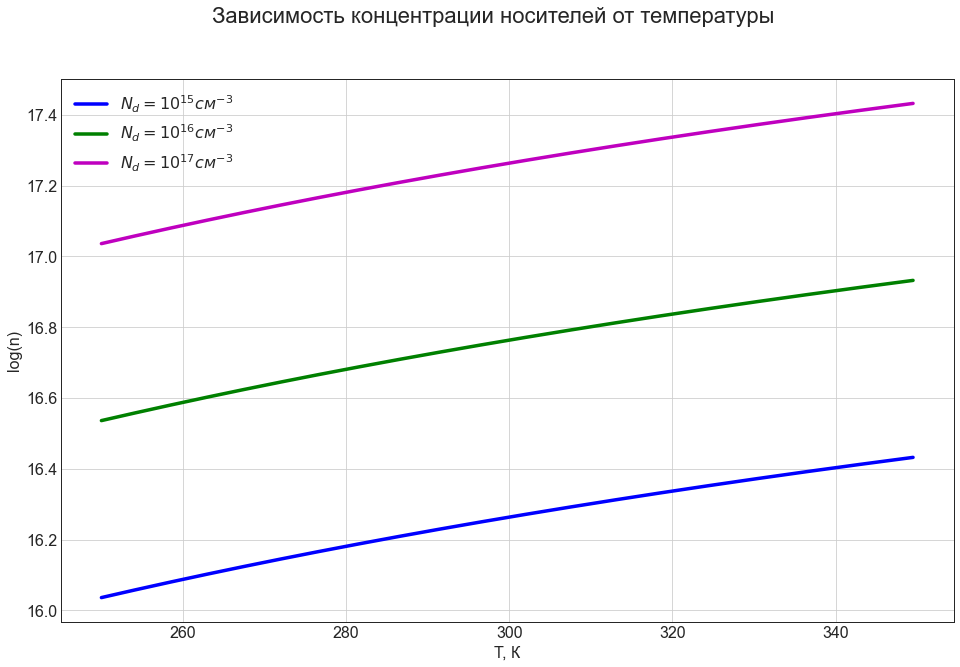

In [91]:
#Инетрвал температур
T = np.arange(250, 350, 0.5)

Nc = 6.2*10**(15)*T**(3/2) #Эффективная плотность состояний в зоне проводимости [cm^(-3)]

#Рассчеты 

#Концентрации электронов в зоне проводимости для различных концентраций примеси
n1 = np.sqrt(Nc*Nd[0]/2)*np.exp((-Ed)/(k*T)) 
n2 = np.sqrt(Nc*Nd[1]/2)*np.exp((-Ed)/(k*T))
n3 = np.sqrt(Nc*Nd[2]/2)*np.exp((-Ed)/(k*T))
#n4 = Nd[3]*np.ones(np.size(T)) + Nc*np.exp((-dE)/(k*T))

#Графики

f, ax = plt.subplots()
f.suptitle(r'Зависимость концентрации носителей от температуры')

plt.plot(T, np.log10(n1), 'b-', linewidth = 3.5, label = r'$N_d = 10^{15} см^{-3}$')
plt.plot(T, np.log10(n2), 'g-', linewidth = 3.5, label = r'$N_d = 10^{16} см^{-3}$')
plt.plot(T, np.log10(n3), 'm-', linewidth = 3.5, label = r'$N_d = 10^{17} см^{-3}$')
#plt.plot(T, np.log10(n4), 'r-', linewidth = 3.5, label = r'$N_d = 10^{18} см^{-3}$')

#Подписи осей
plt.xlabel("T, К")
plt.ylabel(r'log(n)')

#Легенда
ax.legend(loc = 'best')

#Сетка
plt.grid(True)

plt.show()

## Зависимость подвижности носителей от температуры

Подвижность носителей заряда зависит от эффективной массы и времени свободного пробега, которое зависит от механизма рассеяния в кристаллической решетке полупроводника. Наиболее существенными механизмами рассеяния являются рассеяние на фононах и ионзированных примесях.

В случае рассеяния носителей заряда на тепловых колебаниях решетки подвижность, обусловленная этим видом рассеяния, уменьшается с ростом температуры по закону

$$ \tag{3}
    \mu_{ph} \sim T^{-3/2}
$$
Рассеяние на тепловых колебаниях решетки преобладает при высоких температурах.

В случае рассеяния носителей на ионизированных примесях подвижность растет с температурой:

$$ \tag{4}
    \mu_{i} \sim T^{3/2}
$$
Этот механизм рассеяния преобладает при низких температурах.

Температура Дебая кремния составляет $\Theta_D \approx 640$ К. Рассмотрим оба механизма рассеяния, тогда 

$$ \tag{5}
    \frac{1}{\mu} = \frac{1}{\mu_{ph}} + \frac{1}{\mu_{i}}
$$

Рассмотрим экспериментальные данные для температурной завиисмости подвижности электронов от температуры при различных уровнях легирования

1. Чистый Si ($N_d < 10^{-12} cm^{-3}$); (Canali et al. [1973])
2. Чистый Si ($N_d < 4·10^{-13} cm^{-3}$): (Norton et al. [1973])
3. $N_d= 1.75·10^{16} cm^{-3}$; $N_a = 1.48·10^{15} cm^{-3}$; (Morin and Maita [1954]).
4. $N_d= 1.3·10^{17} cm^{-3}$; $N_a = 2.2·10^{15} cm^{-3}$; (Morin and Maita [1954]).

In [94]:
Image(url= "https://www.ioffe.ru/SVA/NSM/Semicond/Si/Figs/131.gif")

И для дырок:

In [95]:
Image(url= "https://www.ioffe.ru/SVA/NSM/Semicond/Si/Figs/136.gif")

Из этих данных можно предположить, что в окрестности комнатной температуры преобладает механизм рассеяния на фононах, но апроксимировать эти данные и получить зависимость подвижности от температуры не представляется возможным. Поэтому будем считать, что в диапазоне наших рабочих температур подвижность - константа.

Для предварительных рассчетов будем счиатть, что подвижность не сильно меняется в окрестности комнатной температуры 

$$    \tag{6}
\mu_e \approx 1400 \frac{см^2}{В \cdot c} \\
\mu_h \approx 450 \frac{см^2}{В \cdot c}
$$

## Температурная зависимость константы Холла

Для полупроводника с носителями заряда двух типов постоянная Холла будет равна:

$$    \tag{7}
    R_H = \frac{1}{e} \cdot \frac{p \mu_p^2 - n \mu_n^2}{(p \mu_p + n \mu_n)^2}
$$
, где $n$ и $p$ - концентрации электронов и дырок соответственно, $\mu_n$ и $\mu_p$ - подвижности электронов и дырок соответственно.

Концентрацию дырок в валентной зоне для кремния n-типа можно найти по формуле (8), т.к. дырки будут сначала падать на донорный уровень, а уже с него в валентную зону.

$$    \tag{8}
    p = N_v \exp \Big(-\frac{\Delta - Ed}{k_Б T}\Big)
$$

Принимая во внимание (1), (6), (7), (8) можно изобразить температурную зависимость постоянной Холла $R_H$ для полупроводника n-типа.

### Константы

In [96]:
mun = 1400 # Подвижность электронов [см^2/(В*с)]
mup = 450 # Подвижность дырок [см^2/(В*с)]
e = 1.6*10**(-19) # Заряд электрона или дырки [Кл]

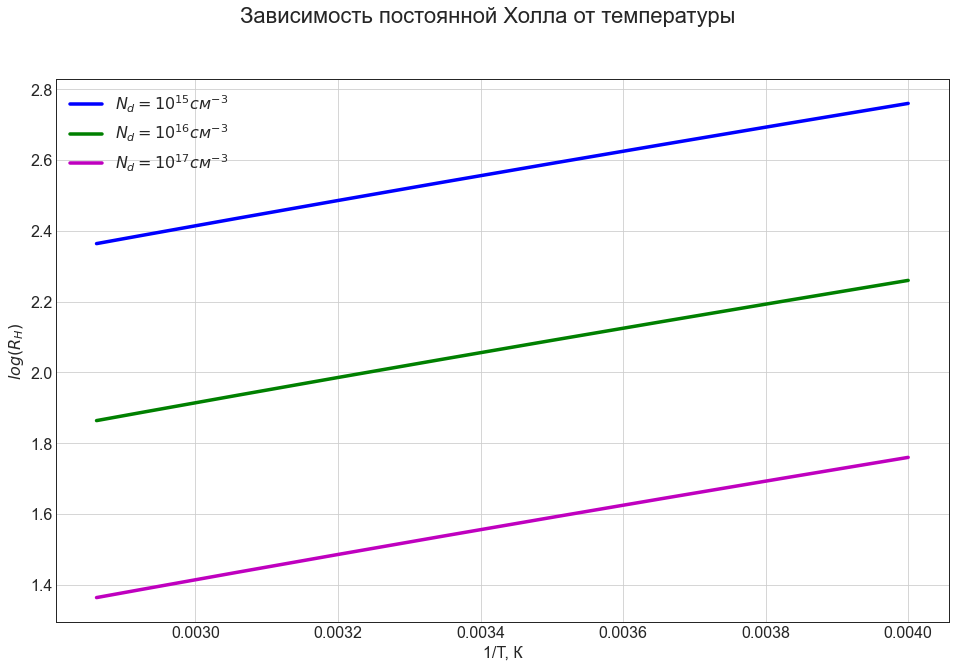

In [98]:
#Интервад температур
T = np.arange(250, 350, 0.5)

#Рассчеты

Nv = 3.5*10**(15)*T**(3/2) #Эффективная плотность состояний в валентной зоне [cm^(-3)]
p = Nv*np.exp(-(dE-Ed)/(k*T)) #Концентрация дырок в валентной зоне 

#Постоянная Холла для различных концентраций примесей [см^3/Кл]
R1 = -(p*mup**2 - n1*mun**2)/(e*(p*mup + n1*mun)**2)
R2 = -(p*mup**2 - n2*mun**2)/(e*(p*mup + n2*mun)**2)
R3 = -(p*mup**2 - n3*mun**2)/(e*(p*mup + n3*mun)**2)
#R4 = -(p*mup**2 - n4*mun**2)/(e*(p*mup + n4*mun)**2)

#Графики

f, ax = plt.subplots()
f.suptitle(r'Зависимость постоянной Холла от температуры')

plt.plot(1/T, np.log10(R1), 'b-', linewidth = 3.5, label = r'$N_d = 10^{15} см^{-3}$')
plt.plot(1/T, np.log10(R2), 'g-', linewidth = 3.5, label = r'$N_d = 10^{16} см^{-3}$')
plt.plot(1/T, np.log10(R3), 'm-', linewidth = 3.5, label = r'$N_d = 10^{17} см^{-3}$')
#plt.plot(1/T, np.log10(R4), 'r-', linewidth = 3.5, label = r'$N_d = 10^{18} см^{-3}$')

#Подписи осей
plt.xlabel("1/T, К")
plt.ylabel(r'$log(R_H)$')

#Легенда
ax.legend(loc = 'best')

#Сетка
plt.grid(True)

plt.show()

Стоит отметить, что в нашем приближении не учитывалось изменение подвижностей носителей и переход в режим собственной проводимости, т.к. интервал возможных температур на всей своей длине меньше температуры полной ионизации примесей.

# Оценка параметров экспериментальной установки 

In [99]:
Image(url= "https://studfile.net/html/2706/288/html_TrT3nmBaEh.jXLD/img-kSu4X3.png")

Схема установки

## Геометрия Холла

Параметрами экспериментальной установки опыте в Холловской геометрии являются разность потенциалов $V_H$, полный ток через образец $J$, размеры образца, расстояние между контактами $L$, расстояние между Холловскими контактами $b$, толщина $d$, магнитное поле $B$, удельное сопротивление $\rho$. 

Магнитное поле выбирается таким, чтобы Холл-фактор был близок к единице $r \approx 1$, длина между контактами должна быть в 3-5 раз больше расстояния между Холловскими контактами.

$$
    V_H = b \cdot E_H
$$

Холл экспериментально установил, что

$$
    \overrightarrow{E_H} = R_H [\overrightarrow{j}, \overrightarrow{B}]
$$

Тогда коэффициент Холла определяется как 

$$    \tag{9}
    R_H = 10^4 \frac{V_H d}{J B}
$$
Мы знаем, что магнитное поле у нас на установке $B \sim 1$ Тл. Так же мы имеем соотношение $\rho = R_H/\mu_H \approx R_H/\mu_n$, тогда по размерам образца можно оценить его сопротивление.

Пусть у нас есть образец размерами 5x15 мм и толщиной 10 микрон, Холловское напряжение мы хотим 0.2В при комнатной температуре 300К на образце с концентрацией примесей $\sim 10^{16} cm^{-3}$

## Зададим параметры установки

In [123]:
L = 1.5 #расстояние между контактами [cм]
b = 0.5 #расстояние между Холловскими контактами [cм]
d = 10**(-5) # толщина [cм]
B = 1 # индукция магнитного поля [Тл]

I = 100*10**(-6) # Ток через образец [А]

23085.908225557752


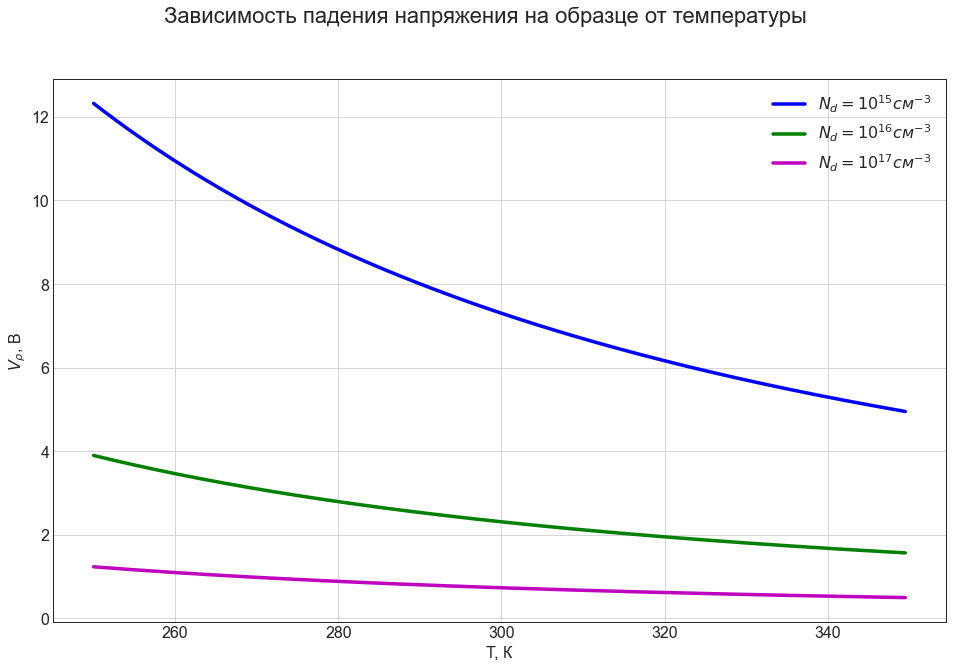

In [133]:
#Интервад температур
T = np.arange(250, 350, 0.5)

#Напряжение Холла
Vh1 = R1/mun*I*L/(d*b)
Vh2 = R2/mun*I*L/(d*b)
Vh3 = R3/mun*I*L/(d*b)

print(R2[100]/mun*L/(d*b))

#Графики

f, ax = plt.subplots()
f.suptitle(r'Зависимость падения напряжения на образце от температуры')

plt.plot(T, Vh1, 'b-', linewidth = 3.5, label = r'$N_d = 10^{15} см^{-3}$')
plt.plot(T, Vh2, 'g-', linewidth = 3.5, label = r'$N_d = 10^{16} см^{-3}$')
plt.plot(T, Vh3, 'm-', linewidth = 3.5, label = r'$N_d = 10^{17} см^{-3}$')

#Подписи осей
plt.xlabel("T, К")
plt.ylabel(r'$V_\rho$, В')

#Легенда
ax.legend(loc = 'best')

#Сетка
plt.grid(True)

plt.show()

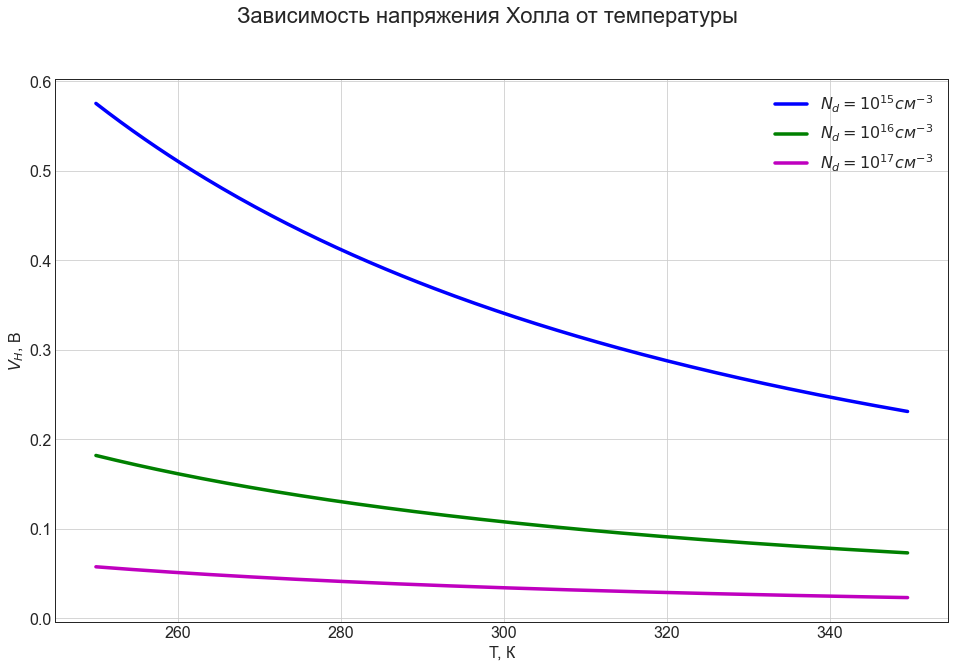

In [126]:
#Интервад температур
T = np.arange(250, 350, 0.5)

#Напряжение Холла
Vh1 = R1*I*B/d/10000
Vh2 = R2*I*B/d/10000
Vh3 = R3*I*B/d/10000

#Графики

f, ax = plt.subplots()
f.suptitle(r'Зависимость напряжения Холла от температуры')

plt.plot(T, Vh1, 'b-', linewidth = 3.5, label = r'$N_d = 10^{15} см^{-3}$')
plt.plot(T, Vh2, 'g-', linewidth = 3.5, label = r'$N_d = 10^{16} см^{-3}$')
plt.plot(T, Vh3, 'm-', linewidth = 3.5, label = r'$N_d = 10^{17} см^{-3}$')

#Подписи осей
plt.xlabel("T, К")
plt.ylabel(r'$V_H$, В')

#Легенда
ax.legend(loc = 'best')

#Сетка
plt.grid(True)

plt.show()